## Demo

In [63]:
%reload_ext autoreload
%autoreload 2
from wavescapes import Wavescape, complex_utm_to_ws_utm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from glob import glob
import os
import networkx as nx
import seaborn as sns
from networkx.algorithms.components import number_connected_components, connected_components
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.cluster import KMeans
from scipy.stats import pearsonr
from sklearn.manifold import TSNE
import plotly.express as px
from scipy.stats import entropy




from etl import get_pcvs, apply_dft_to_all
from utils import most_resonant, custom_utm_to_ws_utm, circular_hue_revised, pitch_class_matrix_to_tritone, pitch_class_matrix_to_minor_major, MOZART_PROFILES, center_of_mass


In [25]:
pcvs = get_pcvs('./pcvs')
dfts = apply_dft_to_all(pcvs)
metadata = pd.read_csv('metadata.tsv', sep='\t', index_col=1)
fname2year = (metadata.composed_end + metadata.composed_start) / 2
print(f"Metadata for {fname2year.shape[0]} files.")
fname2year.head(10)

Metadata for 58 files.


fnames
MIDIl087-03_images_quelques       NaN
l000_etude                     1915.0
l000_soirs                     1917.0
l009_danse                     1880.0
l066-01_arabesques-premiere    1888.0
l067_mazurka                   1890.0
l068_reverie                   1890.0
l069_tarentelle                1890.0
l070_ballade                   1890.0
l071_valse                     1890.0
dtype: float64

In [26]:
metadata.head(5)

rel_paths  last_mc  last_mn  \
fnames                                                    
MIDIl087-03_images_quelques       MS3      186      186   
l000_etude                        MS3       73       71   
l000_soirs                        MS3       23       23   
l009_danse                        MS3       92       92   
l066-01_arabesques-premiere       MS3      107      107   

                                                                        KeySig  \
fnames                                                                           
MIDIl087-03_images_quelques                                              1: -1   
l000_etude                   1: -4, 7: 0, 9: -5, 38: 0, 42: -4, 48: -3, 57:...   
l000_soirs                                                               1: -4   
l009_danse                                                  1: 2, 45: 5, 61: 2   
l066-01_arabesques-premiere                                 1: 4, 39: 3, 71: 4   

                                                       TimeSig  label_count  \
fnames                                                                        
MIDIl087-03_images_quelques  1: 4/4, 74: 6/4, 90: 3/4, 91: 6/8            0   
l000_etude                                              1: 4/4            0   
l000_soirs                                              1: 4/4            0   
l009_danse                                              1: 2/4            0   
l066-01_arabesques-premiere           1: 4/4, 94: 2/4, 95: 4/4            0   

                                   composer           workTitle  \
fnames                                                            
MIDIl087-03_images_quelques             NaN                 NaN   
l000_etude                   Claude Debussy      Etude Retrouve   
l000_soirs                              NaN                 NaN   
l009_danse                   Claude Debussy      Danse Bohemian   
l066-01_arabesques-premiere  Claude Debussy  Premiere Arabesque   

                            movementNumber movementTitle  ... originalFormat  \
fnames                                                    ...                  
MIDIl087-03_images_quelques            NaN           NaN  ...            mid   
l000_etude                             NaN           NaN  ...            NaN   
l000_soirs                             NaN           NaN  ...            NaN   
l009_danse                             NaN           NaN  ...            NaN   
l066-01_arabesques-premiere            NaN           NaN  ...            NaN   

                                                                           pdf  \
fnames                                                                           
MIDIl087-03_images_quelques                                                NaN   
l000_etude                                                                 NaN   
l000_soirs                                                                 NaN   
l009_danse                                                                 NaN   
l066-01_arabesques-premiere  https://imslp.org/wiki/Special:ReverseLookup/2821   

                             staff_1_ambitus staff_1_instrument  \
fnames                                                            
MIDIl087-03_images_quelques  37-100 (C#2-E7)              Piano   
l000_etude                    32-96 (Ab1-C7)              Piano   
l000_soirs                    54-89 (Gb3-F6)              Piano   
l009_danse                   49-94 (C#3-A#6)              Piano   
l066-01_arabesques-premiere   50-92 (D3-G#6)              Piano   

                            staff_2_ambitus staff_2_instrument  \
fnames                                                           
MIDIl087-03_images_quelques  21-94 (A0-A#6)              Piano   
l000_etude                   25-91 (Db1-G6)              Piano   
l000_soirs                    50-77 (D3-F5)              Piano   
l009_danse                    35-71 (B1-B4)              Piano   
l066-01_arabe

In [37]:
piece = 'l009_danse'
utm_max, utm_entropy, utm_argmax = most_resonant(dfts[piece])
utm_max.shape

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\scipy\stats\_entropy.py:72: RuntimeWarning:

invalid value encountered in true_divide



(182, 182)

In [38]:
utm_sum = custom_utm_to_ws_utm(utm_entropy, utm_argmax, dfts[piece], 'entropy')

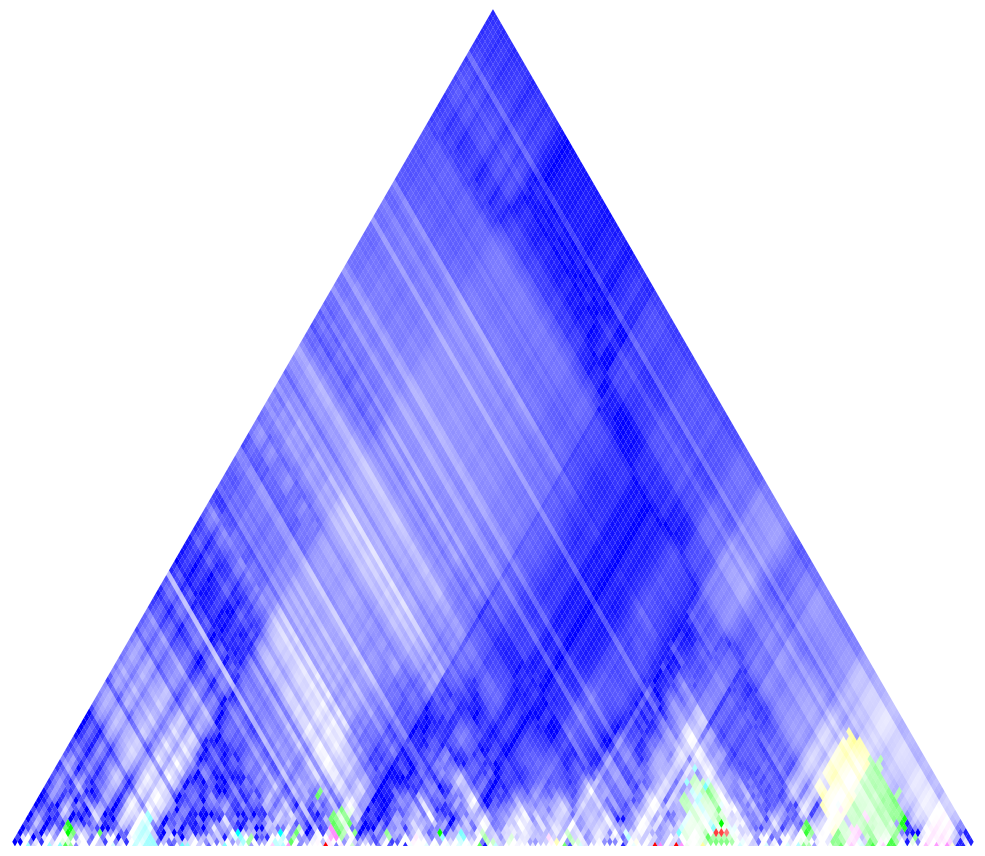

In [39]:
patches = []
for i in range(6):
    patches.append(mpatches.Patch(color=np.array(circular_hue_revised(i))[:3]/255, label='Coefficient '+str(i+1)))

Wavescape(utm_sum, 1000).draw()

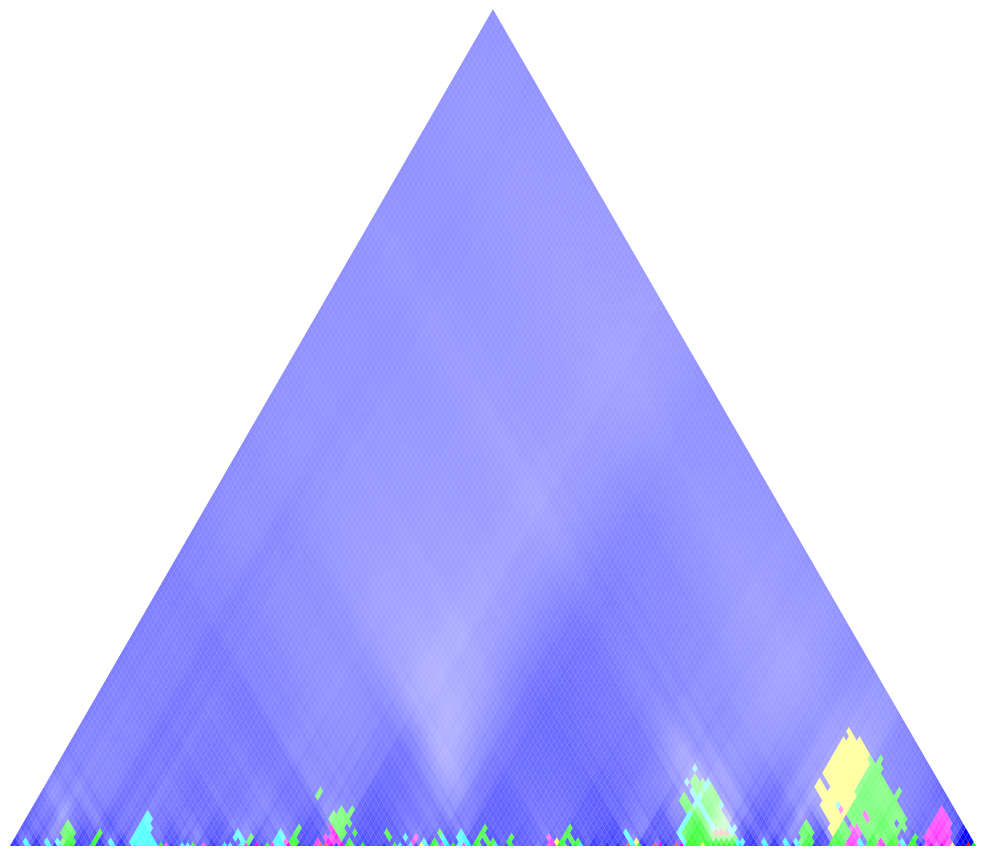

In [ ]:
utm_sum = custom_utm_to_ws_utm(utm_max, utm_argmax, dfts[piece], 'max')
Wavescape(utm_sum, 1000).draw()

## Fragmentation analysis

In [40]:
for i in range(1,7):
    x, y = center_of_mass(i, dfts[piece])
    print('Coefficient: ', i)
    print(x, y)


Coefficient:  1
0.6111076720911434 0.26859444309595387
Coefficient:  2
0.646480844795229 0.30033549443296464
Coefficient:  3
0.6439675197737386 0.28933912428009595
Coefficient:  4
0.6351123408634479 0.2707416054477126
Coefficient:  5
0.6472219704719678 0.3144253196374385
Coefficient:  6
0.6395881844644834 0.19883490173690083


In [ ]:
example = np.array([[1, 1, 1, 1, 1, 1,  ]])

0.6472219704719678 0.3144253196374385


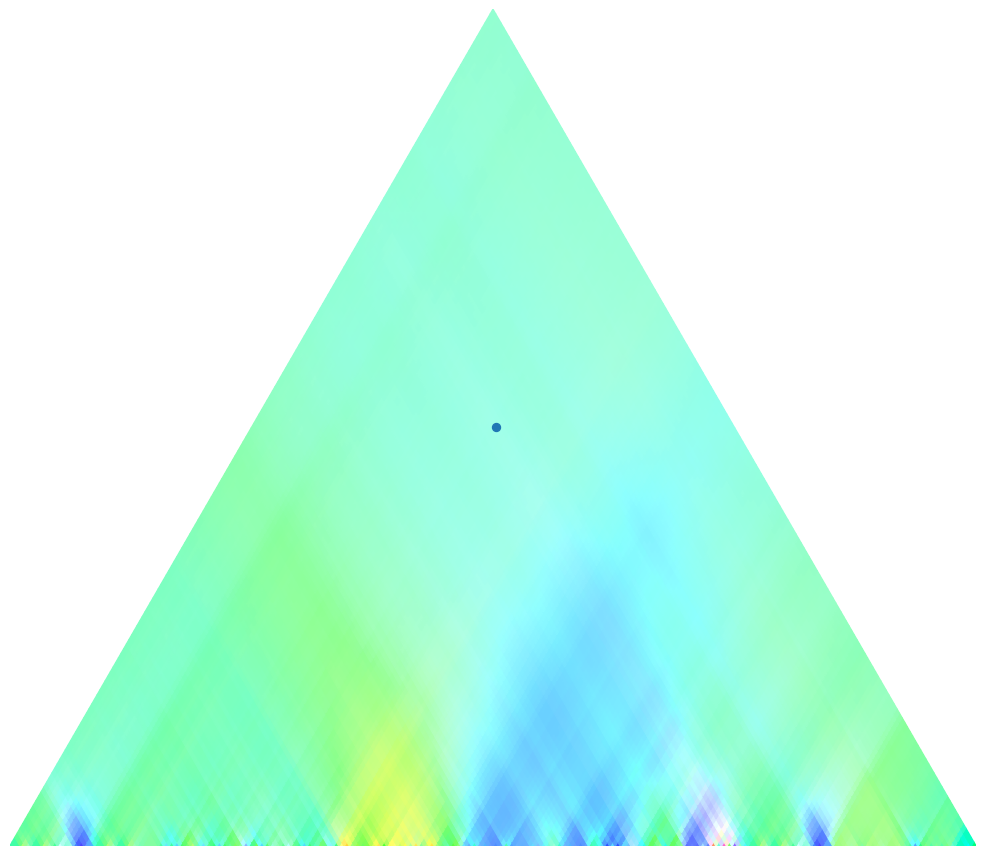

In [41]:
coeff_5 = complex_utm_to_ws_utm(dfts[piece], coeff=5)
x, y = center_of_mass(5, dfts[piece])
Wavescape(coeff_5, 1000).draw()
plt.plot(x, y, marker="o")
print(x, y)

In [42]:
coeff_5[0].shape

(182, 3)

In [43]:
vcoms = []
for it in metadata.iterrows():
    print(it[0])
    try:
        vcom = [center_of_mass(i, dfts[it[0]]) for i in range(1,7)]
        vcoms.append(vcom)
    except Exception as e:
        vcoms.append([np.nan]*6)
        print(e)

MIDIl087-03_images_quelques
'MIDIl087-03_images_quelques'
l000_etude
l000_soirs
l009_danse
l066-01_arabesques-premiere
'l066-01_arabesques-premiere'
l067_mazurka
l068_reverie
l069_tarentelle
l070_ballade
l071_valse
l082_nocturne
l087-01_images_lent
l095-01_pour_prelude
l095-02_pour_sarabande
l095-03_pour_toccata
l100-01_estampes_pagode
index 6 is out of bounds for axis 2 with size 6
l100-02_estampes_soiree
l100-03_estampes_jardins
l106_isle
l110-01_images_reflets
l110-02_images_hommage
l110-03_images_mouvement
l111-02_images_lune
l113-01_childrens_doctor
l113-02_childrens_jimbos
l113-03_childrens_serenade
l113-05_childrens_golliwoggs
l113-05_childrens_little
l114_petit
l115_hommage
l117-02_preludes_voiles
index 5 is out of bounds for axis 2 with size 5
l117-03_preludes_vent
l117-04_preludes_sons
l117-05_preludes_collines
l117-06_preludes_pas
l117-07_preludes_ce
l117-08_preludes_fille
index 6 is out of bounds for axis 2 with size 6
l117-09_preludes_serenade
l117-10_preludes_cathedrale
l

In [52]:
means = []
for it in metadata.iterrows():
    print(it[0])
    try:
        mean = [np.mean(np.abs(dfts[it[0]])[:,:,i]) for i in range(1,7)]
        means.append(mean)
    except Exception as e:
        means.append([np.nan]*6)
        print(e)

MIDIl087-03_images_quelques
'MIDIl087-03_images_quelques'
l000_etude
l000_soirs
l009_danse
l066-01_arabesques-premiere
'l066-01_arabesques-premiere'
l067_mazurka
l068_reverie
l069_tarentelle
l070_ballade
l071_valse
l082_nocturne
l087-01_images_lent
l095-01_pour_prelude
l095-02_pour_sarabande
l095-03_pour_toccata
l100-01_estampes_pagode
index 6 is out of bounds for axis 2 with size 6
l100-02_estampes_soiree
l100-03_estampes_jardins
l106_isle
l110-01_images_reflets
l110-02_images_hommage
l110-03_images_mouvement
l111-02_images_lune
l113-01_childrens_doctor
l113-02_childrens_jimbos
l113-03_childrens_serenade
l113-05_childrens_golliwoggs
l113-05_childrens_little
l114_petit
l115_hommage
l117-02_preludes_voiles
index 5 is out of bounds for axis 2 with size 5
l117-03_preludes_vent
l117-04_preludes_sons
l117-05_preludes_collines
l117-06_preludes_pas
l117-07_preludes_ce
l117-08_preludes_fille
index 6 is out of bounds for axis 2 with size 6
l117-09_preludes_serenade
l117-10_preludes_cathedrale
l

In [44]:
for i in range(1,7):
    metadata[f"center_of_mass_{i}"] = [vcom[i-1][1] if type(vcom[i-1]) != float else np.nan for vcom in vcoms]

In [53]:
for i in range(1,7):
    metadata[f"mean_values_{i}"] = [mean[i-1] if type(mean[i-1]) != float else np.nan for mean in means]

In [54]:
metadata.head()

rel_paths  last_mc  last_mn  \
fnames                                                    
MIDIl087-03_images_quelques       MS3      186      186   
l000_etude                        MS3       73       71   
l000_soirs                        MS3       23       23   
l009_danse                        MS3       92       92   
l066-01_arabesques-premiere       MS3      107      107   

                                                                        KeySig  \
fnames                                                                           
MIDIl087-03_images_quelques                                              1: -1   
l000_etude                   1: -4, 7: 0, 9: -5, 38: 0, 42: -4, 48: -3, 57:...   
l000_soirs                                                               1: -4   
l009_danse                                                  1: 2, 45: 5, 61: 2   
l066-01_arabesques-premiere                                 1: 4, 39: 3, 71: 4   

                                                       TimeSig  label_count  \
fnames                                                                        
MIDIl087-03_images_quelques  1: 4/4, 74: 6/4, 90: 3/4, 91: 6/8            0   
l000_etude                                              1: 4/4            0   
l000_soirs                                              1: 4/4            0   
l009_danse                                              1: 2/4            0   
l066-01_arabesques-premiere           1: 4/4, 94: 2/4, 95: 4/4            0   

                                   composer           workTitle  \
fnames                                                            
MIDIl087-03_images_quelques             NaN                 NaN   
l000_etude                   Claude Debussy      Etude Retrouve   
l000_soirs                              NaN                 NaN   
l009_danse                   Claude Debussy      Danse Bohemian   
l066-01_arabesques-premiere  Claude Debussy  Premiere Arabesque   

                            movementNumber movementTitle  ...  \
fnames                                                    ...   
MIDIl087-03_images_quelques            NaN           NaN  ...   
l000_etude                             NaN           NaN  ...   
l000_soirs                             NaN           NaN  ...   
l009_danse                             NaN           NaN  ...   
l066-01_arabesques-premiere            NaN           NaN  ...   

                            center_of_mass_4  center_of_mass_5  \
fnames                                                           
MIDIl087-03_images_quelques              NaN               NaN   
l000_etude                          0.215618          0.285564   
l000_soirs                          0.282616          0.314550   
l009_danse                          0.270742          0.314425   
l066-01_arabesques-premiere              NaN               NaN   

                            center_of_mass_6 year_between mean_values_1  \
fnames                                                                    
MIDIl087-03_images_quelques              NaN          NaN           NaN   
l000_etude                          0.214474       1915.0      0.052272   
l000_soirs                          0.270731       1917.0      0.077044   
l009_danse                          0.198835       1880.0      0.030375   
l066-01_arabesques-premiere              NaN       1888.0           NaN   

                            mean_values_2  mean_values_3 mean_values_4  \
fnames                                                                   
MIDIl087-03_images_quelques           NaN            NaN           NaN   
l000_etude                       0.059297       0.082762      0.093701   
l000_soirs                       0.124907       0.153305      0.128580   
l009_danse                       0.101521       0.119219      0.070348   
l066-01_arabesques-premiere           NaN            NaN           NaN   

                            mean_values_5  mean_val

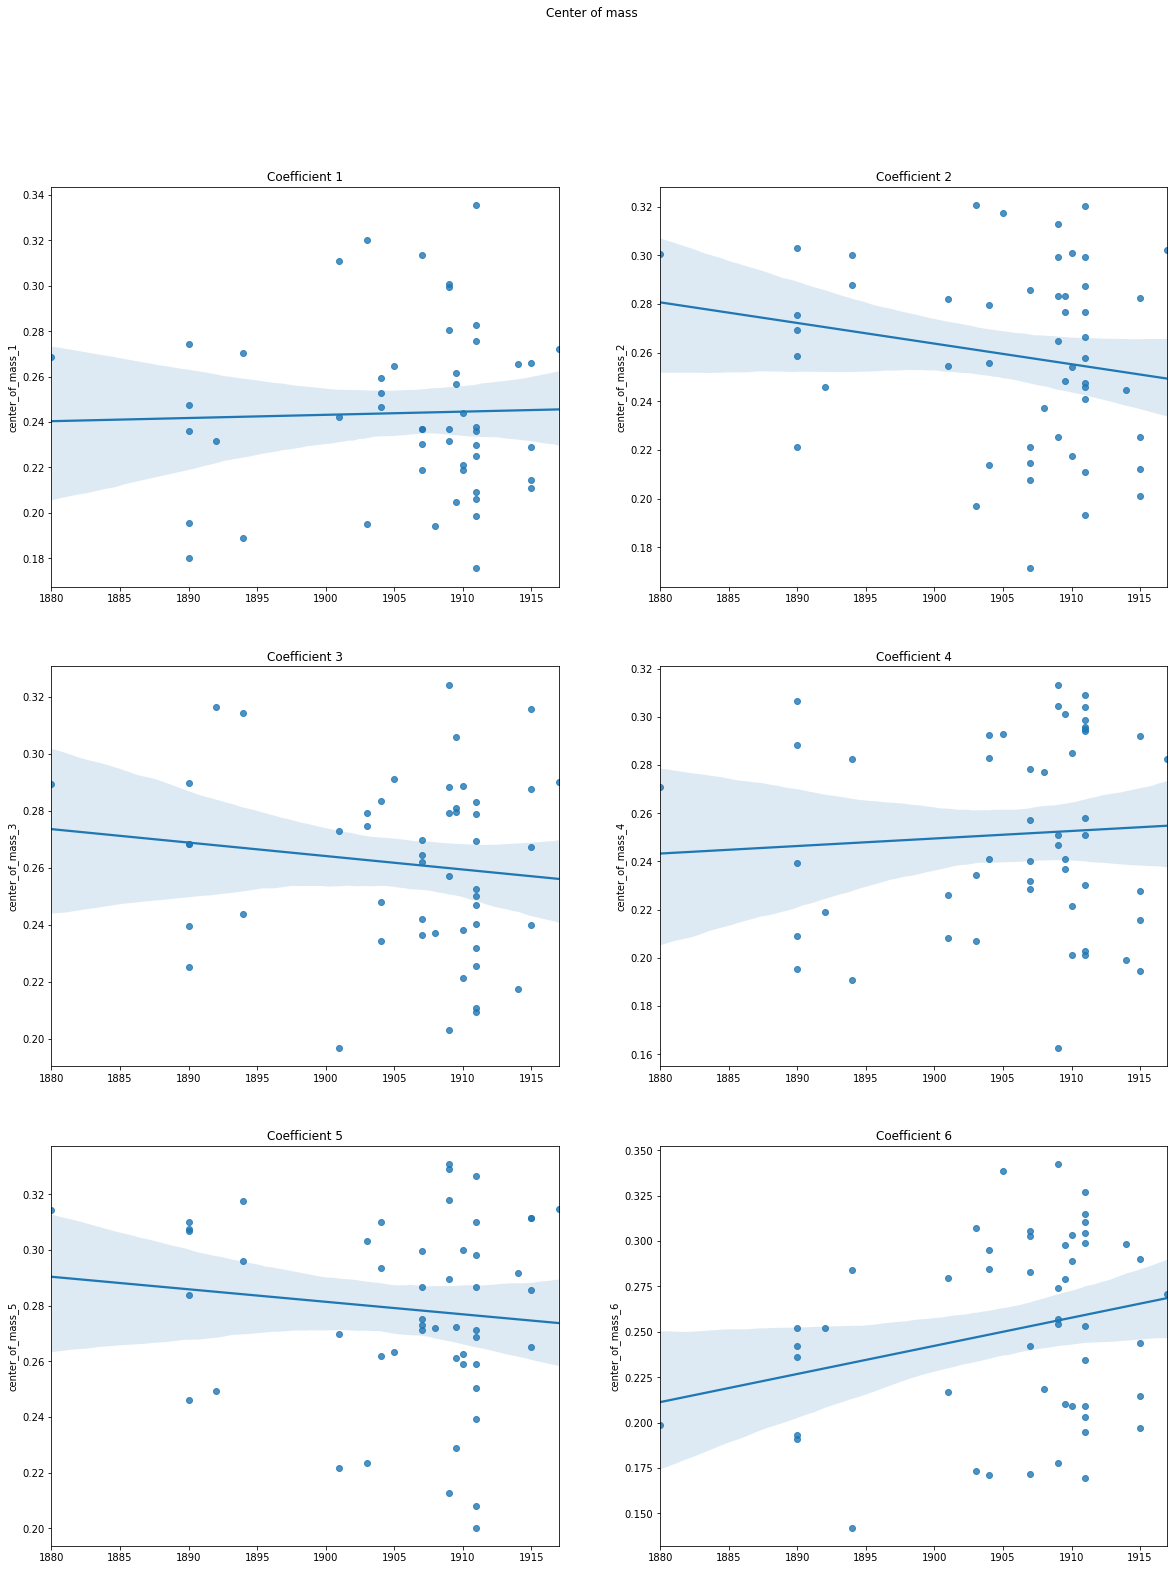

In [60]:
fig, axs = plt.subplots(3,2, figsize=(20,25))
axs = axs.flatten()

fig.suptitle('Center of mass')
columns_com = []

for i in range(1,7):
    axs[i-1].set_title(f"Coefficient {i}")
    columns_com.append(f"center_of_mass_{i}")
    sns.regplot(x=fname2year, y=f"center_of_mass_{i}", data=metadata, ax=axs[i-1])
    #axs[i-1].scatter(fname2year, metadata[])

plt.savefig('figures/center_of_mass.png')

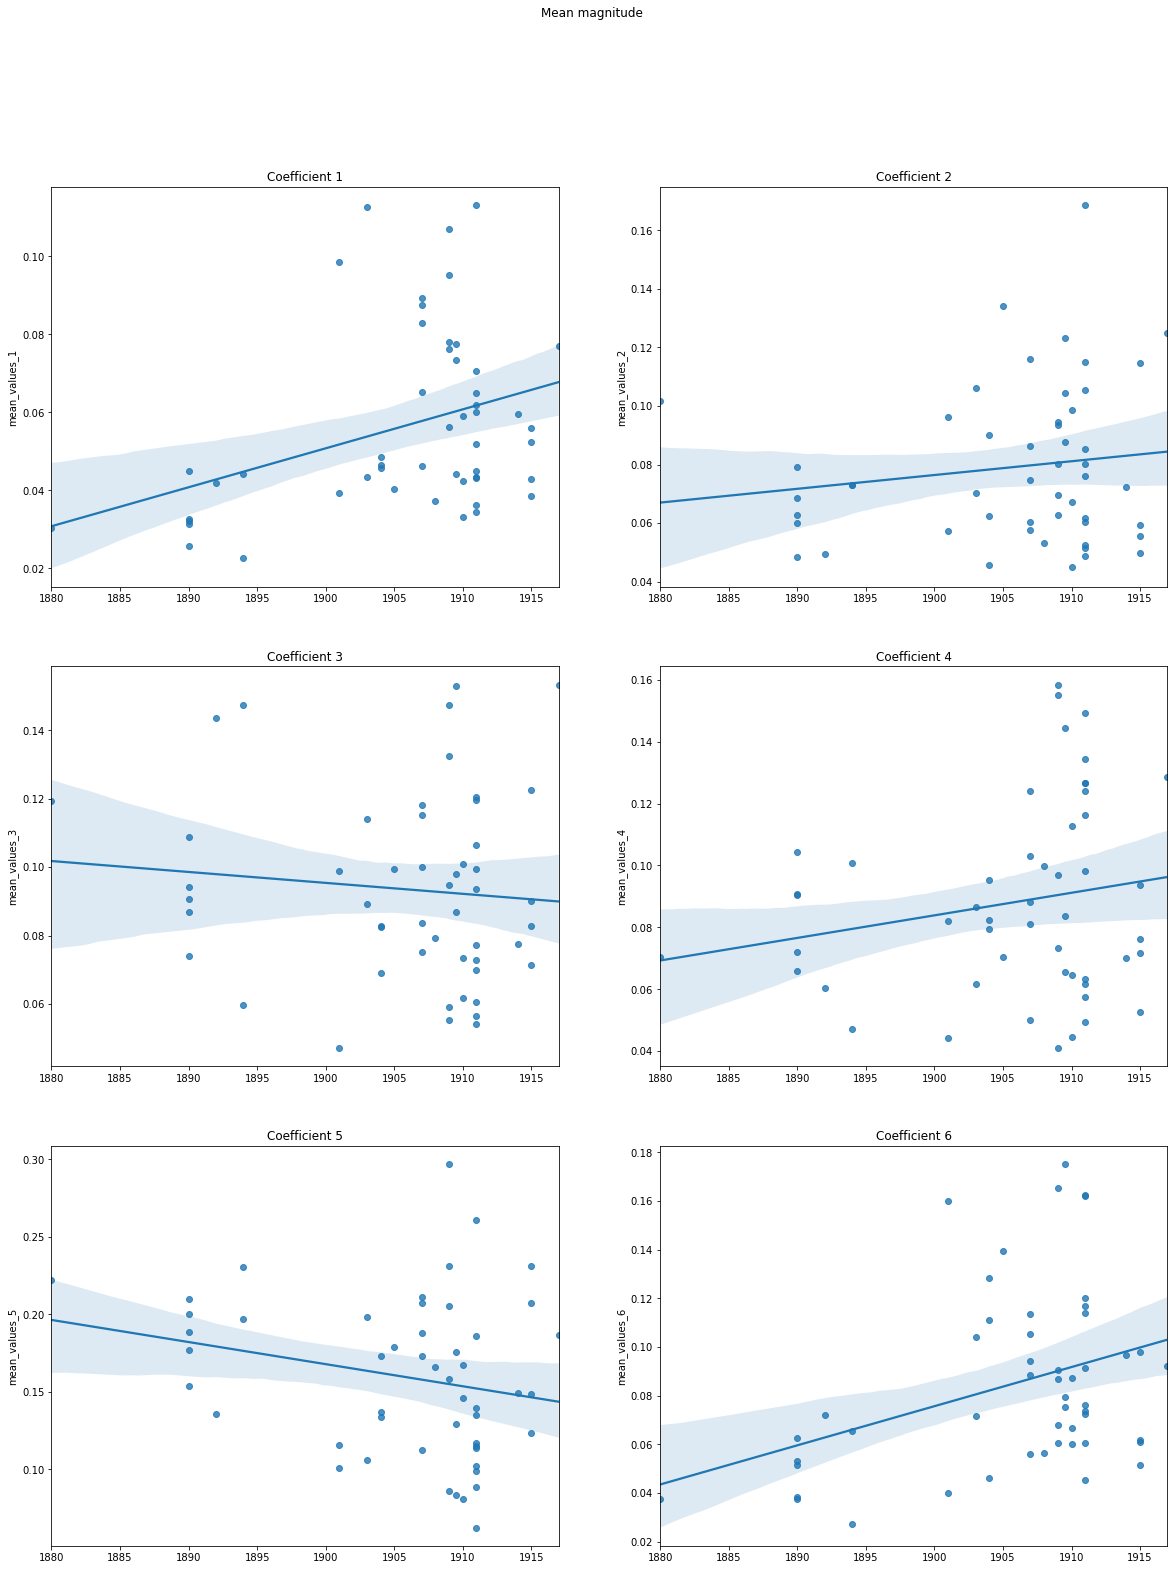

In [55]:
fig, axs = plt.subplots(3,2, figsize=(20,25))
axs = axs.flatten()

fig.suptitle('Mean magnitude')
columns_com = []

for i in range(1,7):
    axs[i-1].set_title(f"Coefficient {i}")
    columns_com.append(f"mean_values_{i}")
    sns.regplot(x=fname2year, y=f"mean_values_{i}", data=metadata, ax=axs[i-1])
    #axs[i-1].scatter(fname2year, metadata[])

plt.savefig('figures/mean_values.png')

In [56]:
metadata['year_between'] = fname2year

metadata_sm = metadata[metadata['center_of_mass_1'].notnull()]#.reset_index()

In [61]:
scaler = StandardScaler()
metadata_sm[columns_com] = scaler.fit_transform(metadata_sm[columns_com])
for col in columns_com:
    y = metadata_sm[col]
    X = metadata_sm[['year_between', 'last_mc']]
    X = sm.add_constant(X)
    results = sm.OLS(y, X).fit()
    print(results.summary())


                            OLS Regression Results                            
Dep. Variable:       center_of_mass_1   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                   0.09497
Date:                Fri, 04 Feb 2022   Prob (F-statistic):              0.910
Time:                        18:01:26   Log-Likelihood:                -72.265
No. Observations:                  51   AIC:                             150.5
Df Residuals:                      48   BIC:                             156.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -12.2914     35.997     -0.341   

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

C:\User

## Number of connected regions

In [8]:

def add(adj_list, a, b):
    adj_list.setdefault(a, []).append(b)
    adj_list.setdefault(b, []).append(a)

adj_list = {}
        
utm_index = np.arange(0, utm_argmax.shape[0]*utm_argmax.shape[1]).reshape(utm_argmax.shape[0], utm_argmax.shape[1])
for i in range(len(utm_argmax)):
    for j in range(len(utm_argmax[i])):
        if (j < len(utm_argmax[i]) - 1) and (utm_argmax[i][j] == utm_argmax[i][j+1]):
            add(adj_list, utm_index[i][j], utm_index[i][j+1])
        if i < len(utm_argmax[i]) - 1:
            for x in range(max(0, j - 1), min(len(utm_argmax[i+1]), j+2)):
                if (utm_argmax[i][j] == utm_argmax[i+1][x]):
                    add(adj_list, utm_index[i][j], utm_index[i+1][x])

import pprint
pprint.pprint(adj_list)


{0: [1, 183],
 1: [0, 2, 183, 184],
 2: [1, 183, 184],
 3: [185],
 4: [5, 186, 187],
 5: [4, 6, 186, 187, 188],
 6: [5, 187, 188],
 7: [189],
 8: [190],
 9: [191],
 10: [11, 192, 193],
 11: [10, 192, 193, 194],
 12: [13, 195],
 13: [12, 14, 195, 196],
 14: [13, 195, 196, 197],
 15: [198],
 16: [17, 197, 199],
 17: [16, 18, 199, 200],
 18: [17, 199, 200],
 19: [201],
 20: [21, 202, 203],
 21: [20, 22, 202, 203, 204],
 22: [21, 203, 204],
 23: [24, 205, 206],
 24: [23, 25, 205, 206, 207],
 25: [24, 26, 206, 207, 208],
 26: [25, 27, 207, 208, 209],
 27: [26, 208, 209],
 30: [31, 211, 212, 213],
 31: [30, 212, 213, 214],
 32: [33],
 33: [32],
 35: [216, 217, 218],
 37: [38, 218, 219, 220],
 38: [37, 39, 219, 220, 221],
 39: [38, 220, 221, 222],
 40: [41],
 41: [40],
 42: [223, 224, 225],
 43: [226],
 45: [228],
 47: [228, 229, 230],
 50: [51, 232, 233],
 51: [50, 232, 233],
 52: [234],
 53: [235, 236],
 54: [55, 237],
 55: [54, 56, 237, 238],
 56: [55, 237, 238, 239],
 57: [240],
 58: [59]

In [9]:
G = nx.Graph(adj_list)
print(number_connected_components(G))

56


In [69]:
components = connected_components(G)
# with this compute the entropy
# normalized areas of the connected components (n of nodes) 

lengths = [len(x)/G.size() for x in components]

entropy(lengths) / entropy([1]*G.size())

0.07051747136644114

In [11]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 33083
Number of edges: 129141
Average degree:   7.8071


measure prominence of a coefficient in the piece: integrating over the opacity of entropy summary wavescape

## Summary plots

In [24]:
#all_wavescapes(data['filepath'][1], individual_width=500, aw_size=4)

In [25]:
if '.\\figures' not in glob('./*'):
    print('making folder')
    os.makedirs('figures')


In [26]:
  
for score in dfts.items():
    print(score[0])
    try:
        utm_max, utm_entropy, utm_argmax = most_resonant(score[1])
        utm_sum = custom_utm_to_ws_utm(utm_max, utm_argmax, score[1], 'max')
        Wavescape(utm_sum, 1000).draw()
        plt.suptitle(score[0] + '\n', fontsize=14)
        plt.legend(handles=patches)
        plt.savefig('./figures/' + str(score[0]) + '.png')
        plt.close()
        utm_sum = custom_utm_to_ws_utm(utm_entropy, utm_argmax, score[1], 'entropy')
        Wavescape(utm_sum, 1000).draw()
        plt.suptitle('entropy - ' + str(score[0]) + '\n', fontsize=14)
        plt.legend(handles=patches)
        plt.savefig('./figures/entropy_' + str(score[0]) + '.png')
        plt.close()
        
    except Exception as e:
        print(e)

l087-03_images_quelques


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\scipy\stats\_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


The number of elements to be drawn exceeds the wavescape's resolution.(679 elements out of 500 allowed by the resolution) Increase the width of the plot to solve this issue
l000_etude
l000_soirs
l009_danse
l066-01_arabesques
l067_mazurka
l068_reverie
l069_tarentelle
The number of elements to be drawn exceeds the wavescape's resolution.(995 elements out of 500 allowed by the resolution) Increase the width of the plot to solve this issue
l070_ballade
l071_valse
l082_nocturne
l087-01_images_lent
l095-01_pour_prelude
The number of elements to be drawn exceeds the wavescape's resolution.(535 elements out of 500 allowed by the resolution) Increase the width of the plot to solve this issue
l095-02_pour_sarabande
l095-03_pour_toccata
The number of elements to be drawn exceeds the wavescape's resolution.(530 elements out of 500 allowed by the resolution) Increase the width of the plot to solve this issue
l100-01_estampes_pagode
l100-02_estampes_soiree
l100-03_estampes_jardins
The number of elem

## Vector expansions with tritone, major, minor

In [12]:
# tritone detector
 
utm_tritone = pitch_class_matrix_to_tritone(pcvs[piece])
print(utm_tritone.shape)
#utm_tritone[0]

(182, 182, 1)


In [13]:
# major and minor detector

key_profiles = {
    'major': np.array(list(MOZART_PROFILES['major'].values())),
    'minor': np.array(list(MOZART_PROFILES['minor'].values()))
}
rotated_kp = {(mode, rotation): np.roll(kp, rotation) for mode, kp in key_profiles.items() for rotation in range(12)}
rotated_kp

{('major',
  0): array([0.200337  , 0.01081261, 0.1139921 , 0.01210411, 0.13638737,
        0.12263113, 0.01899352, 0.20490465, 0.01461186, 0.07414111,
        0.01135115, 0.07973339]),
 ('major',
  1): array([0.07973339, 0.200337  , 0.01081261, 0.1139921 , 0.01210411,
        0.13638737, 0.12263113, 0.01899352, 0.20490465, 0.01461186,
        0.07414111, 0.01135115]),
 ('major',
  2): array([0.01135115, 0.07973339, 0.200337  , 0.01081261, 0.1139921 ,
        0.01210411, 0.13638737, 0.12263113, 0.01899352, 0.20490465,
        0.01461186, 0.07414111]),
 ('major',
  3): array([0.07414111, 0.01135115, 0.07973339, 0.200337  , 0.01081261,
        0.1139921 , 0.01210411, 0.13638737, 0.12263113, 0.01899352,
        0.20490465, 0.01461186]),
 ('major',
  4): array([0.01461186, 0.07414111, 0.01135115, 0.07973339, 0.200337  ,
        0.01081261, 0.1139921 , 0.01210411, 0.13638737, 0.12263113,
        0.01899352, 0.20490465]),
 ('major',
  5): array([0.20490465, 0.01461186, 0.07414111, 0.01135115

In [14]:
utm_major_minor = pitch_class_matrix_to_minor_major(pcvs[piece], rotated_kp)
utm_major_minor.shape

(182, 182, 2)

In [15]:
utm_exp = np.concatenate((np.abs(dfts[piece][:,:,1:]), utm_tritone, utm_major_minor), axis=2)
utm_exp.shape

(182, 182, 9)

In [77]:

data_exp = pd.DataFrame(np.array([utm_exp[:,:,i].flatten() for i in range(9)]).T)
data_exp = data_exp[data_exp[0] != 0]
data_exp.columns = ['Coeff 1', 'Coeff 2', 'Coeff 3', 'Coeff 4', 'Coeff 5', 'Coeff 6', 'Tritone', 'Major', 'Minor']
data_exp['fname'] = piece
data_exp['x_coord'] = data_exp.index % utm_exp.shape[0]
data_exp['y_coord'] = data_exp.index // utm_exp.shape[0]

#scaler = MinMaxScaler()
#data_exp = pd.DataFrame(scaler.fit_transform(data_exp), columns=data_exp.columns)

data_exp.sample(100) #con bootstrapping

Coeff 1    Coeff 2    Coeff 3    Coeff 4     Coeff 5  Coeff 6  \
24897  21.925095  81.578088  82.186526  44.740048  180.293016     9.00   
956     0.187891   3.577272   3.020761   4.594494    6.896263     0.75   
7530    9.645319  30.699908  35.833382  18.662713   55.958682    10.00   
8240   12.646359  49.626889  41.463840  29.906364   77.213832    12.25   
5403    6.869531  11.799762  14.470876   8.458539   51.553039     3.25   
...          ...        ...        ...        ...         ...      ...   
2776    2.712776  11.082785  10.350121   8.125000   20.977300     0.25   
4510    3.492921  16.005858  15.988277   8.112490   26.670199     1.00   
5627    2.932797  42.697336  42.520583  23.875982   49.767195    16.50   
16719  11.184089  39.015822  43.106337  21.780510  110.336037     4.25   
20017  14.203413  65.505725  70.611835  41.738022  140.069003    23.75   

        Tritone     Major     Minor       fname  x_coord  y_coord  
24897  0.058420  0.657819  0.636100  l009_danse      145      136  
956    0.015067  0.543635  0.675782  l009_danse       46        5  
7530   0.002571  0.686569  0.565795  l009_danse       68       41  
8240   0.096882  0.423278  0.523460  l009_danse       50       45  
5403   0.006426  0.568221  0.578335  l009_danse      125       29  
...         ...       ...       ...         ...      ...      ...  
2776   0.014398  0.543869  0.677209  l009_danse       46       15  
4510   0.181644  0.459123  0.525638  l009_danse      142       24  
5627   0.052284  0.651702  0.572649  l009_danse      167       30  
16719  0.039225  0.681605  0.579313  l009_danse      157       91  
20017  0.020555  0.704541  0.759149  l009_danse      179      109  

[100 rows x 12 columns]

In [70]:
cols = ['Coeff 1', 'Coeff 2', 'Coeff 3', 'Coeff 4', 'Coeff 5', 'Coeff 6', 'Tritone', 'Major', 'Minor']
scaler = StandardScaler()
#data_exp[cols] = scaler.fit_transform(data_exp[cols])

kmeans = KMeans(n_clusters=5, random_state=0).fit(data_exp[cols])

In [71]:
data_exp['Cluster'] = kmeans.labels_

In [72]:
pca = PCA(n_components=2)
PCA_results = pca.fit_transform(data_exp[cols])
data_exp['Dimension 1'] = [res[0] for res in PCA_results]
data_exp['Dimension 2'] = [res[1] for res in PCA_results]

data_exp.head()

Coeff 1   Coeff 2   Coeff 3   Coeff 4   Coeff 5   Coeff 6   Tritone  \
0 -1.416667 -1.194808 -1.348736 -1.188784 -1.404237 -1.021577 -0.874098   
1 -1.421611 -1.212492 -1.364789 -1.197298 -1.412397 -1.092357 -0.874098   
2 -1.326515 -1.273541 -1.441149 -1.237100 -1.443426 -1.092357  0.475247   
3 -1.382582 -1.246386 -1.447446 -1.138140 -1.445748 -0.809236  5.197955   
4 -1.416667 -1.194808 -1.348736 -1.188784 -1.404237 -1.021577 -0.874098   

      Major     Minor       fname  x_coord  y_coord  Cluster  Dimension 1  \
0  0.574956  3.112837  l009_danse        0        0        2    -2.985376   
1  0.402597  3.068267  l009_danse        1        0        2    -3.014622   
2  1.298072 -1.224498  l009_danse        2        0        2    -3.228210   
3 -4.142327 -2.262154  l009_danse        3        0        4    -2.673778   
4  0.574956  3.112837  l009_danse        4        0        2    -2.985376   

   Dimension 2  
0    -1.526753  
1    -1.409450  
2    -0.131332  
3     7.045910  
4    -1.526753

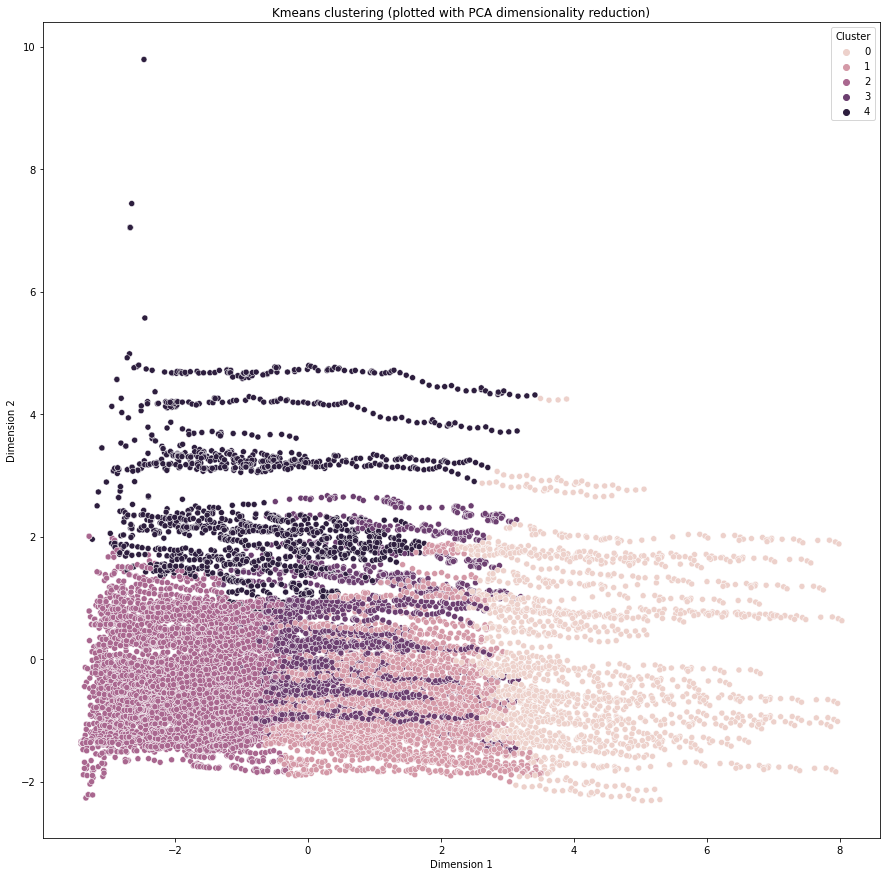

In [73]:
plt.figure(figsize=(15,15))

px.scatter(data_exp, x='Dimension 1', y='Dimension 2', color='Cluster', hover_data=['fname', 'x_coord', 'y_coord'])
sns.scatterplot(data=data_exp, x='Dimension 1', y='Dimension 2', hue='Cluster')
plt.title('Kmeans clustering (plotted with PCA dimensionality reduction)')
#plt.xlim(-10, 10)
#plt.ylim(-10, 10)
plt.show()

In [76]:
for col in data_exp.columns:
    for col2 in data_exp.columns:
        if col != col2:
            corr = pearsonr(data_exp[col], data_exp[col2])
            if abs(corr[0]) > 0.6:
                print(col, col2)
                print(pearsonr(data_exp[col], data_exp[col2]))

# linear independence: predict one feature from others

Coeff 1 Coeff 2
(0.8727031506834624, 0.0)
Coeff 1 Coeff 3
(0.8953410621092888, 0.0)
Coeff 1 Coeff 4
(0.8825873535360901, 0.0)
Coeff 1 Coeff 5
(0.9354872324650221, 0.0)
Coeff 1 y_coord
(0.9099595809069588, 0.0)
Coeff 2 Coeff 1
(0.8727031506834624, 0.0)
Coeff 2 Coeff 3
(0.9655548628904818, 0.0)
Coeff 2 Coeff 4
(0.9694051064865072, 0.0)
Coeff 2 Coeff 5
(0.9131221694384091, 0.0)
Coeff 2 y_coord
(0.8776778624838568, 0.0)
Coeff 3 Coeff 1
(0.8953410621092888, 0.0)
Coeff 3 Coeff 2
(0.9655548628904818, 0.0)
Coeff 3 Coeff 4
(0.9491164888888898, 0.0)
Coeff 3 Coeff 5
(0.9549053469677797, 0.0)
Coeff 3 y_coord
(0.9395826584428211, 0.0)
Coeff 4 Coeff 1
(0.8825873535360901, 0.0)
Coeff 4 Coeff 2
(0.9694051064865072, 0.0)
Coeff 4 Coeff 3
(0.9491164888888898, 0.0)
Coeff 4 Coeff 5
(0.9094025208124791, 0.0)
Coeff 4 y_coord
(0.8774179327833118, 0.0)
Coeff 5 Coeff 1
(0.9354872324650221, 0.0)
Coeff 5 Coeff 2
(0.9131221694384091, 0.0)
Coeff 5 Coeff 3
(0.9549053469677797, 0.0)
Coeff 5 Coeff 4
(0.909402520812479

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

